# 3章 教師なし学習と前処理
## 3.1 教師なし学習の種類
## 3.2 教師なし学習の難しさ
## 3.3 前処理とスケール変換

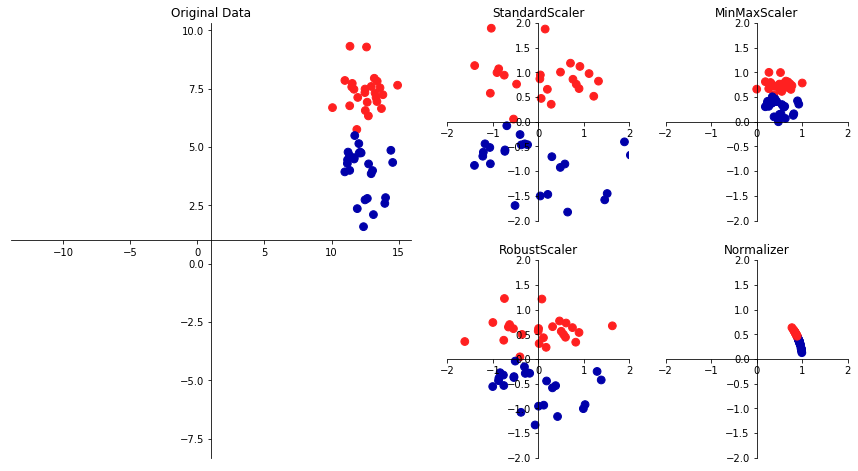

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

mglearn.plots.plot_scaling()

### 3.3.1 さまざまな前処理
### 3.3.2 データ変換の適用

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [4]:
x_train_scaled = scaler.transform(x_train)

print("transformed shape: {}".format(x_train_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(x_train.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(x_train.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(x_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(x_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01 

In [5]:
x_test_scaled = scaler.transform(x_test)

print("per-feature minimum after scaling:\n{}".format(x_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(x_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


### 3.3.3 訓練データとテストデータを同じように変換する

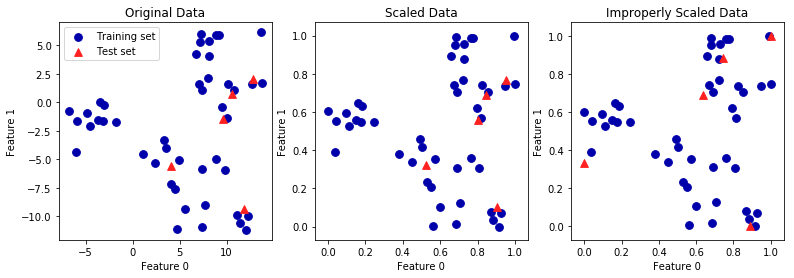

In [6]:
from sklearn.datasets import make_blobs

x, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
x_train, x_test = train_test_split(x, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(x_test[:, 0], x_test[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
axes[1].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(x_test_scaled[:, 0], x_test_scaled[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(x_test)
x_test_scaled_badly = test_scaler.transform(x_test)
axes[2].scatter(x_train_scaled[:, 0], x_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(x_test_scaled_badly[:, 0], x_test_scaled_badly[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

### 3.3.4 教師あり学習における前処理の効果

In [7]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(x_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(x_test, y_test)))

Test set accuracy: 0.63


In [8]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm.fit(x_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(x_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm.fit(x_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(x_test_scaled, y_test)))

Scaled test set accuracy: 0.96


## 3.4 次元削減、特徴量抽出、多様体学習
### 3.4.1 主成分分析 (PCA)

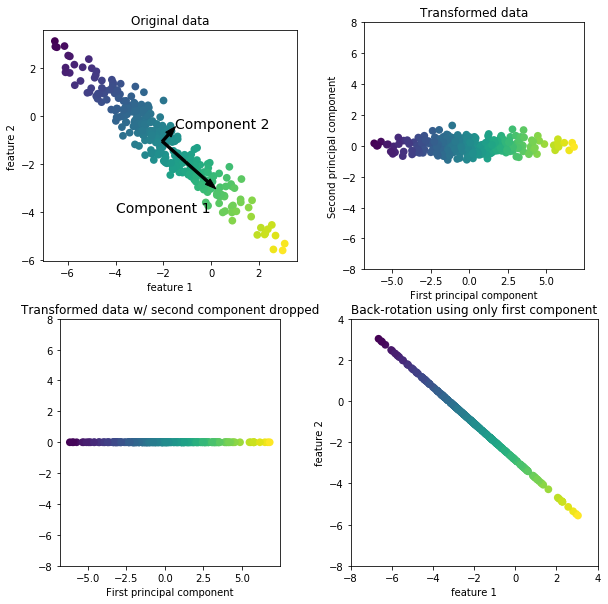

In [10]:
mglearn.plots.plot_pca_illustration()

#### 3.4.1.1 cancerデータセットのPCAによる可視化

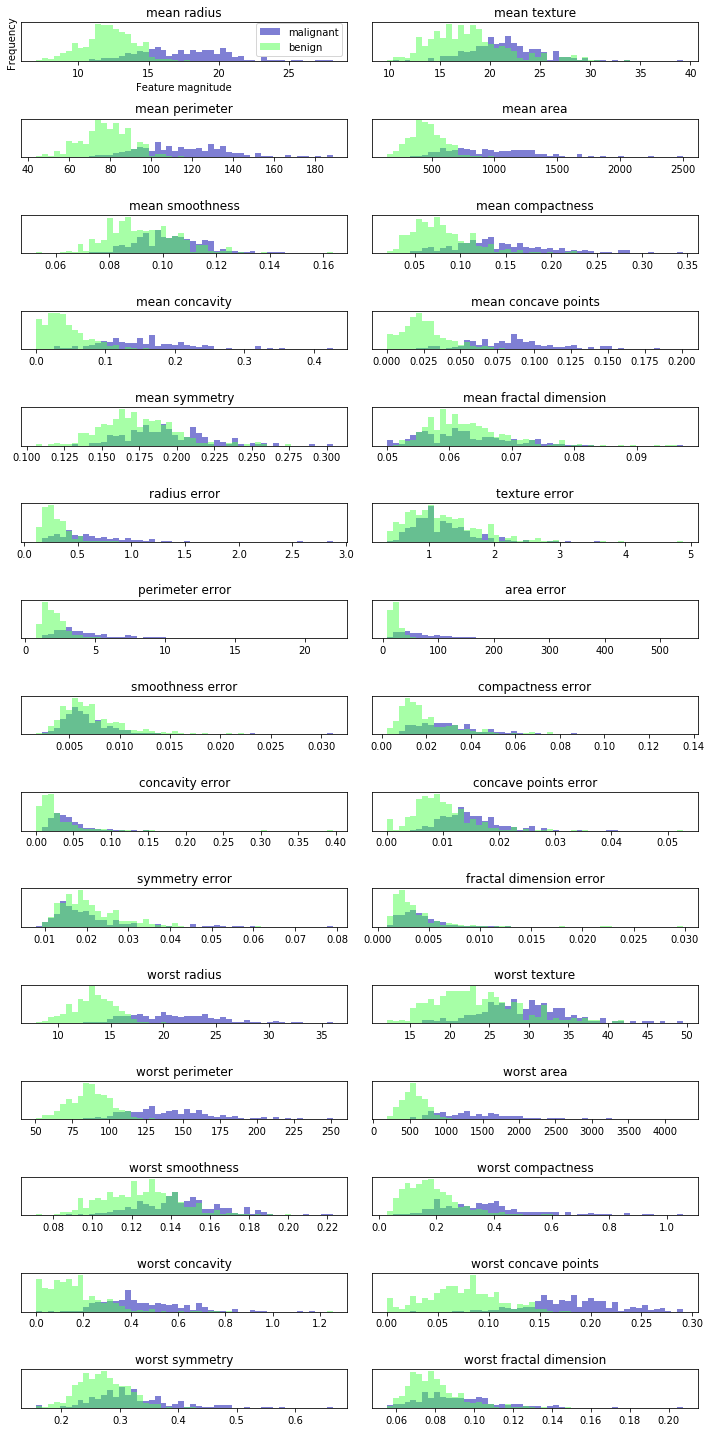

In [11]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

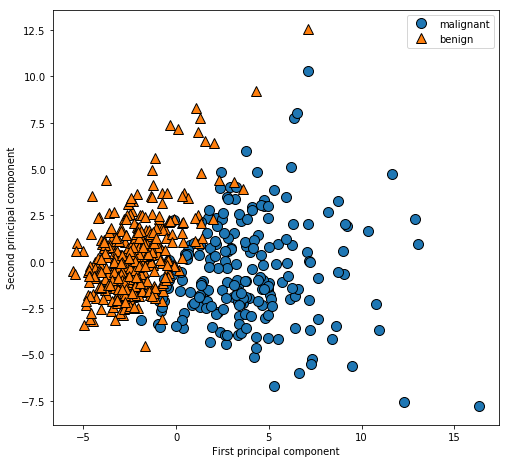

In [12]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [13]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

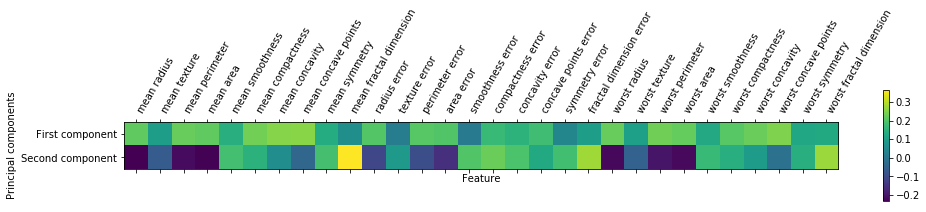

In [14]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

#### 3.4.1.2 固有顔による特徴量抽出

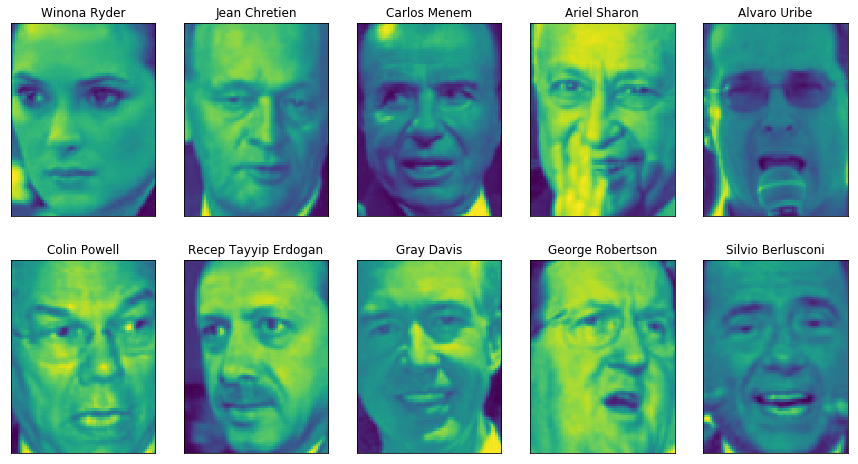

In [15]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    

In [16]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [17]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end="    ")
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [18]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]

x_people = x_people / 255

In [19]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(x_test, y_test)))

Test set score of 1-nn: 0.23


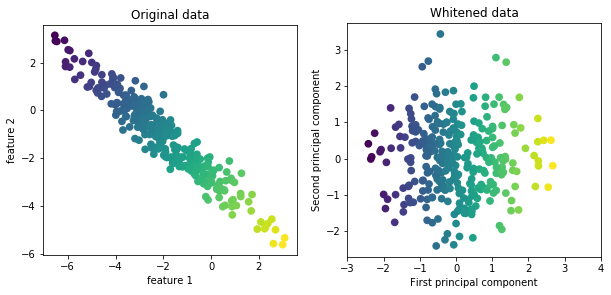

In [20]:
mglearn.plots.plot_pca_whitening()

In [21]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

print("x_train_pca.shape: {}".format(x_train_pca.shape))

x_train_pca.shape: (1547, 100)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(x_test_pca, y_test)))

Test set accuracy: 0.31


pca.components_.shape: (100, 5655)


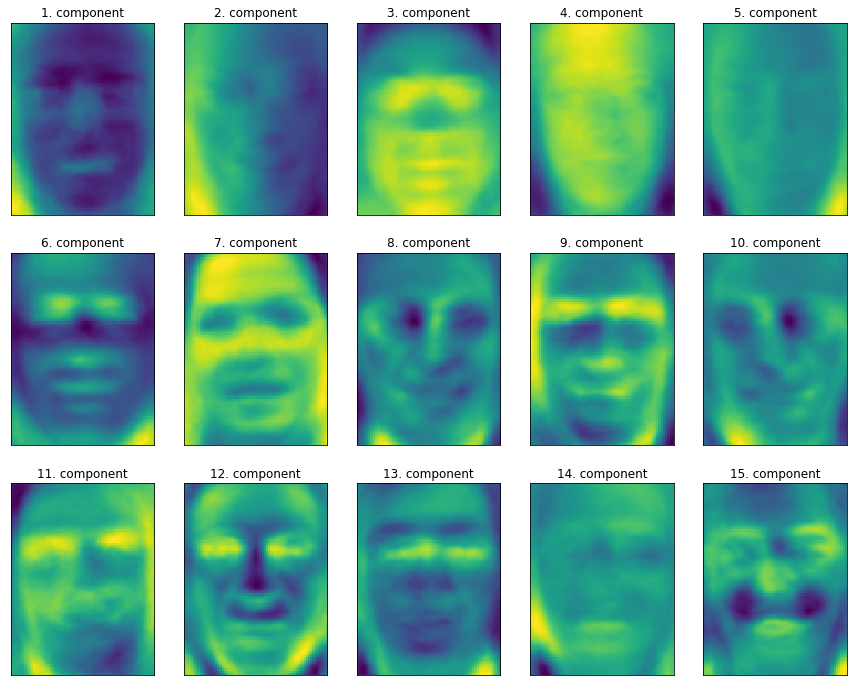

In [23]:
print("pca.components_.shape: {}".format(pca.components_.shape))

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("{}. component".format((i + 1)))

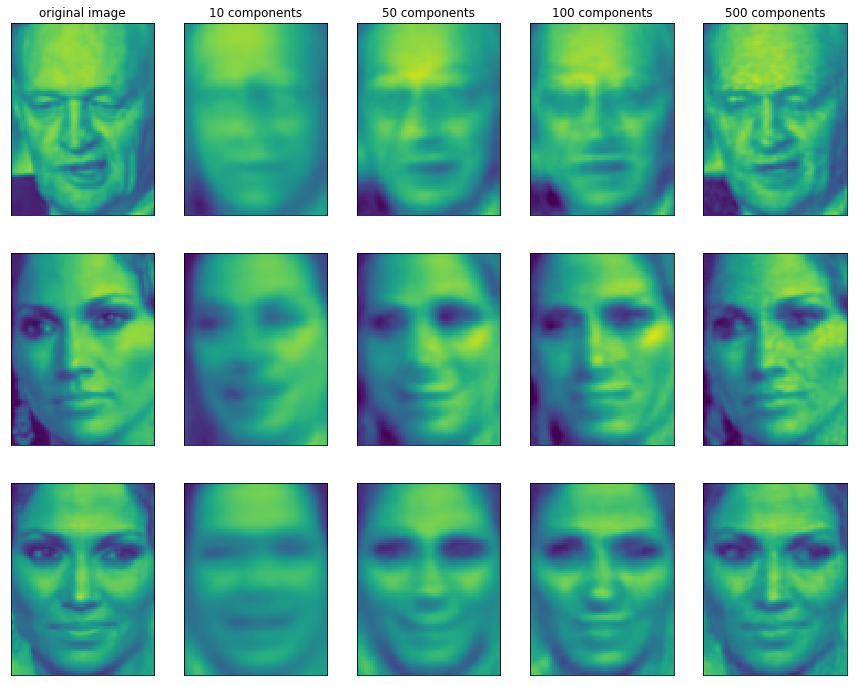

In [24]:
mglearn.plots.plot_pca_faces(x_train, x_test, image_shape)

Text(0,0.5,'Second principal component')

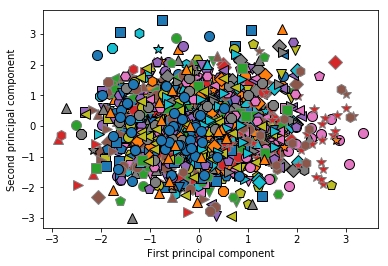

In [25]:
mglearn.discrete_scatter(x_train_pca[:, 0], x_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### 3.4.2 非負値行列因子分解 (NMF)
#### 3.4.2.1 NMF の合成データへの適用

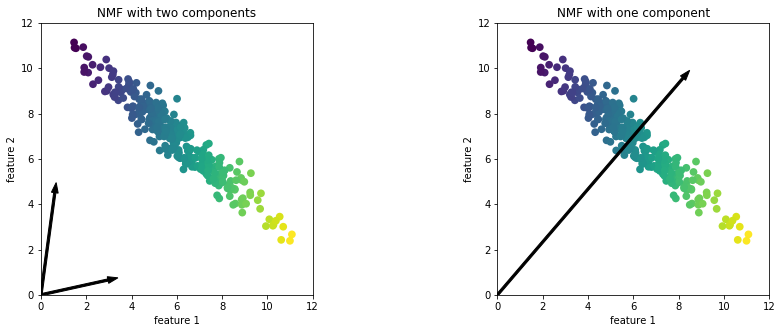

In [26]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[ 0.535948, ...,  0.243137],
       ..., 
       [ 0.043137, ...,  0.596078]], dtype=float32), 
array([[ 0.237908, ...,  0.269281],
       ..., 
       [ 0.4     , ...,  0.254902]], dtype=float32))
_____________________________________________________nmf_faces - 973.3s, 16.2min


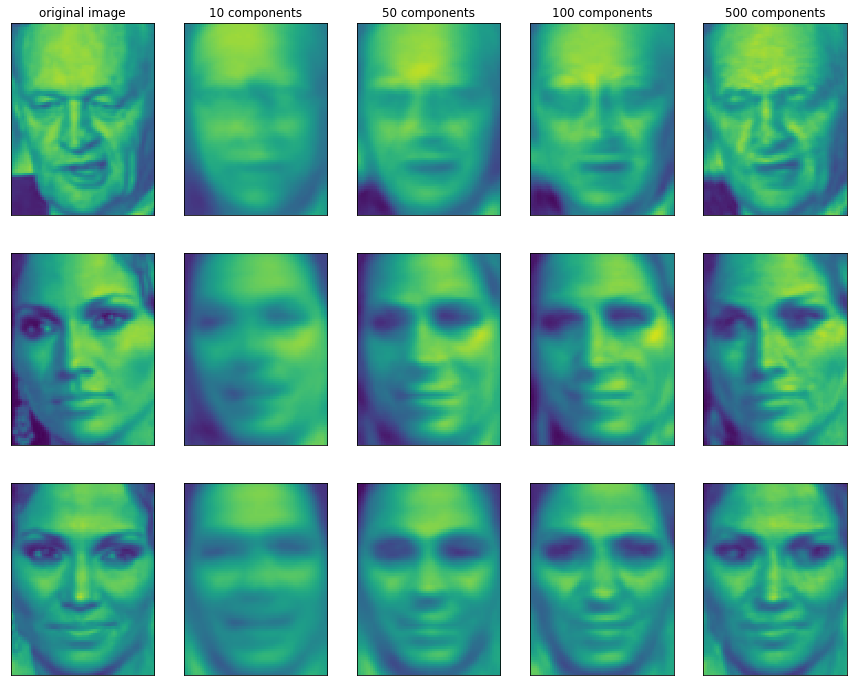

In [31]:
mglearn.plots.plot_nmf_faces(x_train, x_test, image_shape)

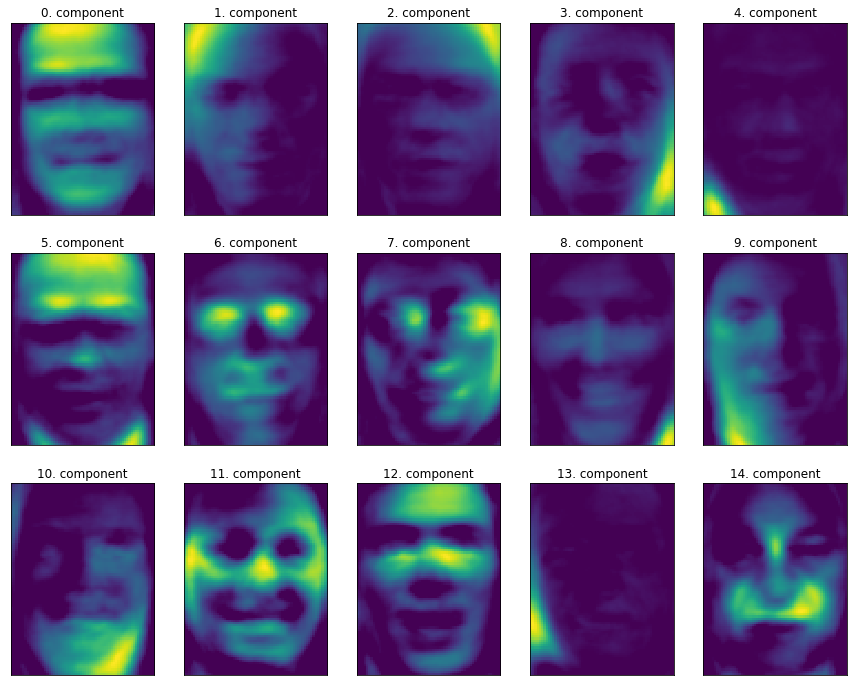

In [30]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(x_train)

x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

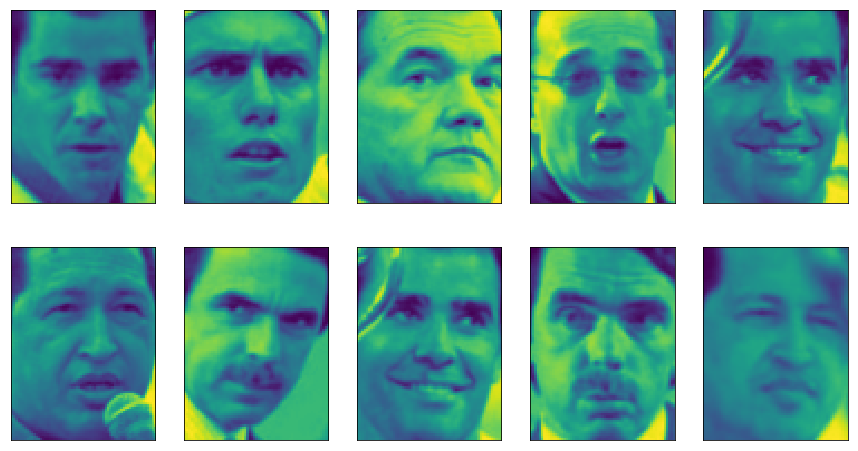

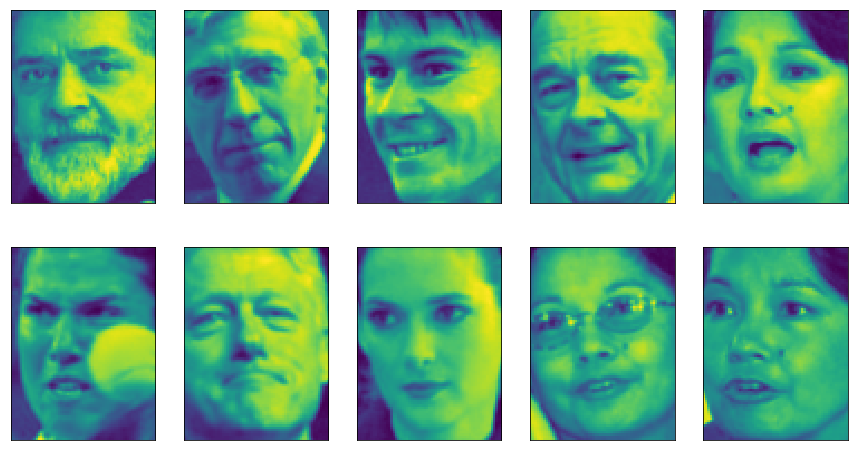

In [32]:
compn = 3
inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))
    
compn = 7
inds = np.argsort(x_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(x_train[ind].reshape(image_shape))

Text(0,0.5,'Signal')

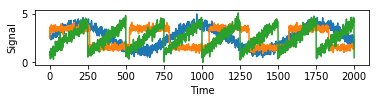

In [33]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")

In [35]:
A = np.random.RandomState(0).uniform(size=(100, 3))
x = np.dot(S, A.T)
print("Shape of measurements: {}".format(x.shape))

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(x)
print("Recovered signal shape: {}".format(S_.shape))

Shape of measurements: (2000, 100)
Recovered signal shape: (2000, 3)


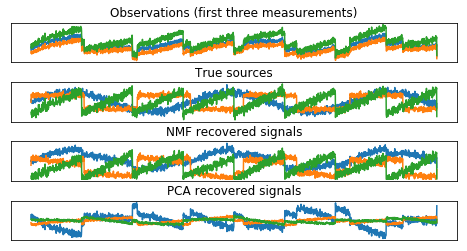

In [36]:
pca = PCA(n_components=3)
H = pca.fit_transform(x)

models = [x, S, S_, H]
names = ["Observations (first three measurements)",
        "True sources",
        "NMF recovered signals",
        "PCA recovered signals"]

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], "-")

### 3.4.3 t-SNEを用いた多様体学習

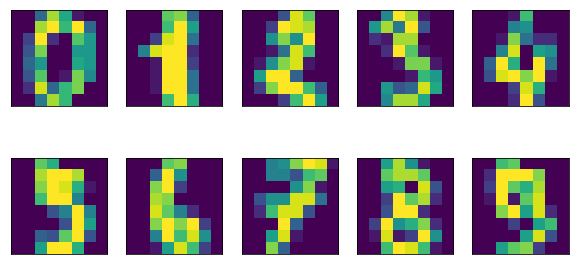

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0,0.5,'Second principal component')

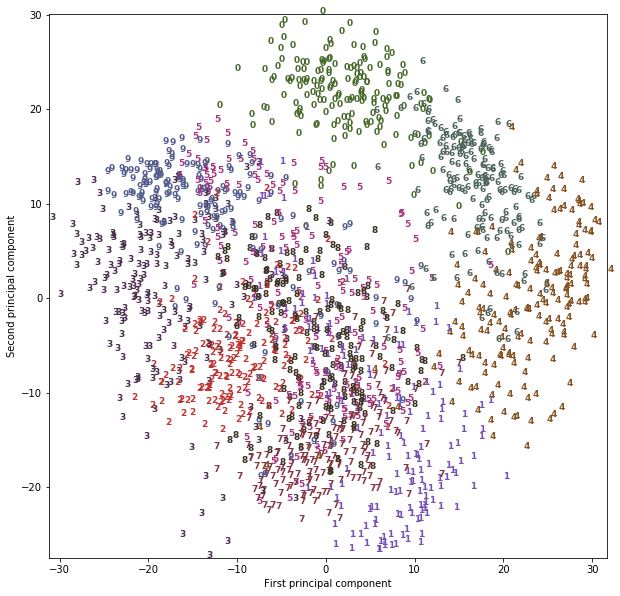

In [38]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
         "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={"weight":"bold", "size":9})
    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

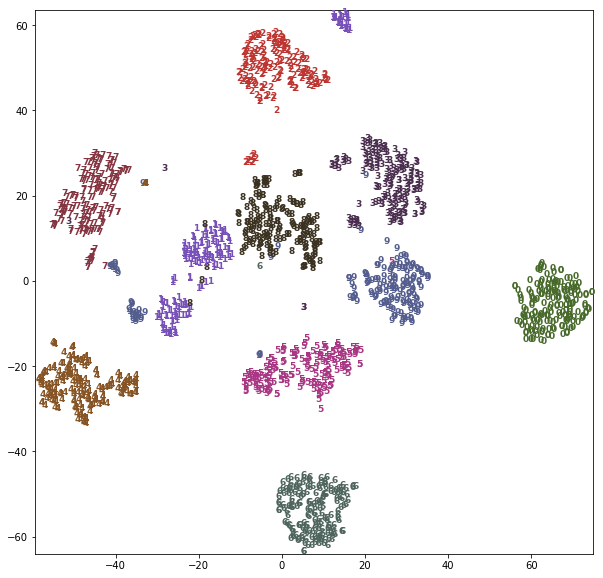

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={"weight":"bold", "size":9})

## 3.5 クラスタリング
### 3.5.1 k-meansクラスタリング

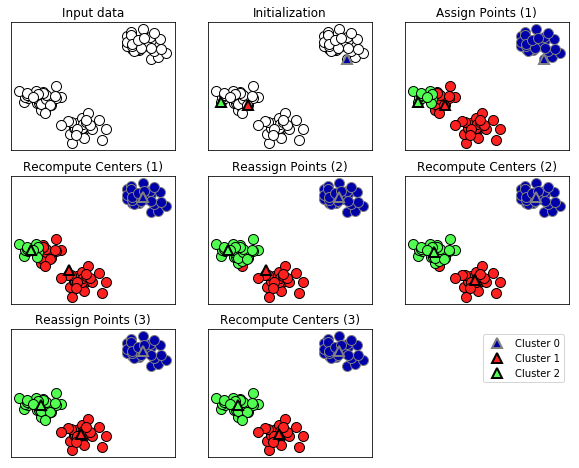

In [40]:
mglearn.plots.plot_kmeans_algorithm()

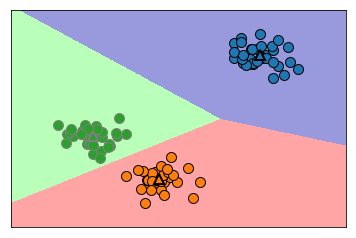

In [41]:
mglearn.plots.plot_kmeans_boundaries()

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [43]:
print(kmeans.predict(x))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


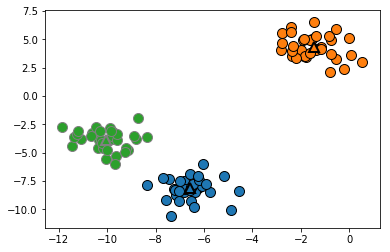

In [45]:
mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers="^", markeredgewidth=2)


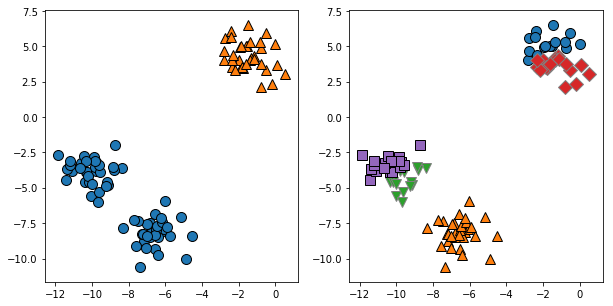

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
assignments = kmeans.labels_

mglearn.discrete_scatter(x[:, 0], x[:, 1], assignments, ax=axes[1])

#### 3.5.1.1 k-meansがうまくいかない場合

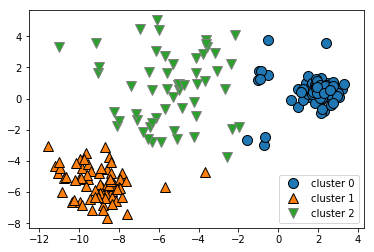

In [48]:
x_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x_varied)

mglearn.discrete_scatter(x_varied[:, 0], x_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc="best")


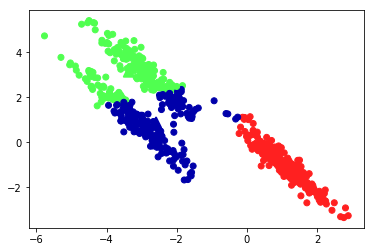

In [51]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
x = np.dot(x, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="^",c=[0,1,2],s=100,linewidth=2,cmap=mglearn.cm3)


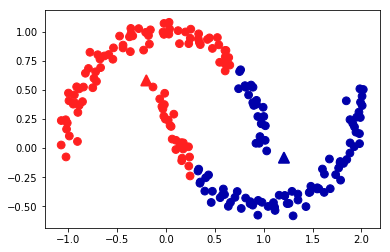

In [52]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)


plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="^",c=[mglearn.cm2(0), mglearn.cm2(1)],s=100,linewidth=2,cmap=mglearn.cm3)


#### 3.5.1.2 ベクトル量子化、もしくは成分分解としてのk-means

Text(0,0.5,'nmf')

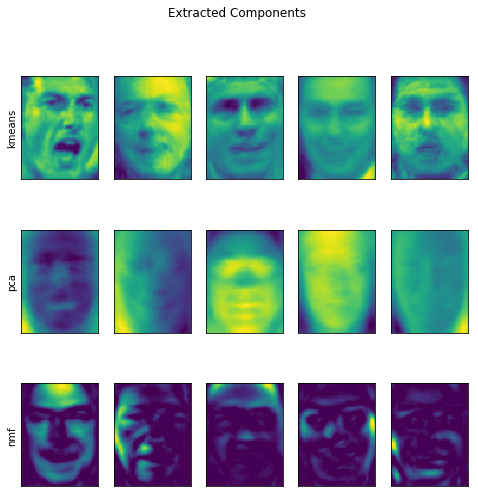

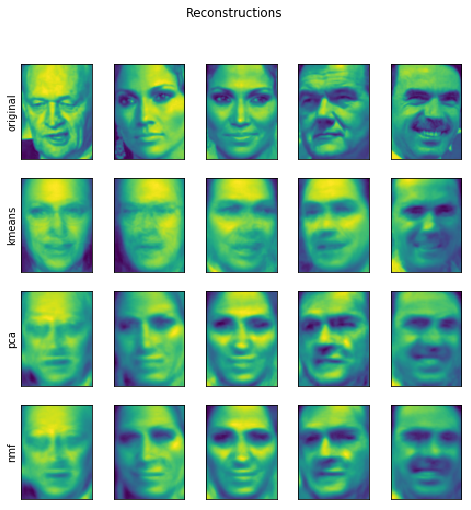

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people, random_state=0)
                                                   
nmf = NMF(n_components=100, random_state=0)
nmf.fit(x_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(x_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(x_train)

x_reconstructed_pca = pca.inverse_transform(pca.transform(x_test))
x_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(x_test)]
x_reconstructed_nmf = np.dot(nmf.transform(x_test), nmf.components_)

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), "yticks": ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap="viridis")
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={"xticks": (), "yticks": ()}, figsize=(8,8))

fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, x_test, x_reconstructed_kmeans, x_reconstructed_pca, x_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


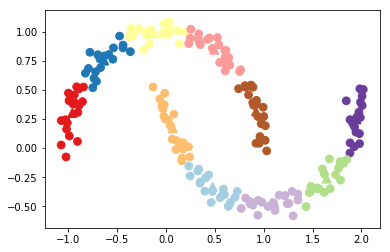

In [56]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=60, cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker="^", c=range(kmeans.n_clusters), linewidth=2, cmap="Paired")
print("Cluster memberships:\n{}".format(y_pred))

In [57]:
distance_features = kmeans.transform(x)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[ 0.9220768   1.46553151  1.13956805 ...,  1.16559918  1.03852189
   0.23340263]
 [ 1.14159679  2.51721597  0.1199124  ...,  0.70700803  2.20414144
   0.98271691]
 [ 0.78786246  0.77354687  1.74914157 ...,  1.97061341  0.71561277
   0.94399739]
 ..., 
 [ 0.44639122  1.10631579  1.48991975 ...,  1.79125448  1.03195812
   0.81205971]
 [ 1.38951924  0.79790385  1.98056306 ...,  1.97788956  0.23892095
   1.05774337]
 [ 1.14920754  2.4536383   0.04506731 ...,  0.57163262  2.11331394
   0.88166689]]
